In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
sns.set()
%matplotlib inline

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

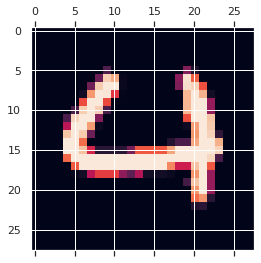

In [ ]:
plt.matshow(X_train[60])

In [ ]:
y_train[60]

4

In [ ]:
X_train = X_train/255
X_test = X_test/255 #Scaling the data to get good accuracy

How to flatten the 28x28 image to a single straight array

In [ ]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_train_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train_flatten.shape

(60000, 784)

In [ ]:
X_test_flatten = X_test.reshape(len(X_test),28*28)
X_test_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test_flatten.shape

(10000, 784)

In [ ]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4661 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3032 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2827 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9258


Lets evalute the accuracy on test dataset

In [ ]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2684 - accuracy: 0.9255


[0.26838070154190063, 0.9254999756813049]

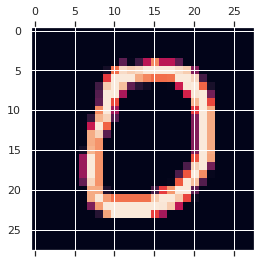

In [ ]:
plt.matshow(X_test[10])

In [ ]:
y_predict = model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_predict

array([[2.57164631e-02, 2.77836875e-07, 5.91580532e-02, ...,
        9.99844849e-01, 1.01417236e-01, 7.41832852e-01],
       [5.47781229e-01, 8.91756918e-03, 9.99445677e-01, ...,
        7.05917096e-13, 1.47358239e-01, 2.84655477e-09],
       [4.09239670e-04, 9.94058311e-01, 6.07206106e-01, ...,
        1.15104176e-01, 3.56297314e-01, 5.20196445e-02],
       ...,
       [5.71235705e-06, 4.40979284e-06, 1.26350648e-03, ...,
        3.05433542e-01, 5.35344243e-01, 8.66074383e-01],
       [1.57513437e-04, 1.55494243e-04, 1.23283447e-04, ...,
        6.47961569e-05, 6.93621099e-01, 1.62523022e-04],
       [2.26873420e-02, 3.55274948e-10, 1.47662953e-01, ...,
        1.98564045e-08, 2.62145826e-04, 7.29927763e-07]], dtype=float32)

In [ ]:
y_predict[10]

array([9.9906969e-01, 1.7285970e-07, 4.1249958e-01, 8.0228910e-02,
       1.2943998e-04, 8.4608203e-01, 4.8376832e-02, 3.9298149e-05,
       6.6988444e-01, 5.8065652e-04], dtype=float32)

So as the first value has more acturate score means that it is null bcs these are 10 output values from 0 to 9


In [ ]:
np.argmax(y_predict[10])

0

So it is predicting right

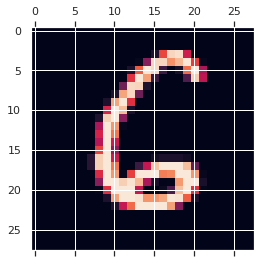

In [ ]:
plt.matshow(X_test[98])

In [ ]:
y_predict[98]

array([7.6390016e-01, 1.0664962e-03, 7.0634663e-01, 1.9860440e-03,
       4.7159311e-03, 9.6787554e-01, 9.9949181e-01, 6.9946417e-08,
       2.0145182e-01, 7.2032367e-06], dtype=float32)

In [ ]:
np.argmax(y_predict[98])

6

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Confusion Matrix using tensorflow

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    4,    7,    2,    1,    0],
       [   0, 1115,    2,    2,    0,    1,    4,    2,    9,    0],
       [   8,    9,  916,   20,    8,    5,   13,   11,   37,    5],
       [   4,    0,   15,  922,    0,   27,    2,   12,   20,    8],
       [   1,    1,    2,    2,  912,    0,   13,    4,    8,   39],
       [  11,    1,    2,   31,    6,  787,   15,    7,   25,    7],
       [  14,    3,    5,    1,    7,   12,  913,    2,    1,    0],
       [   2,    5,   18,    8,    6,    1,    0,  955,    4,   29],
       [  10,    9,    5,   27,   10,   33,    9,   12,  850,    9],
       [  11,    7,    1,   10,   25,    9,    0,   21,    4,  921]],
      dtype=int32)>

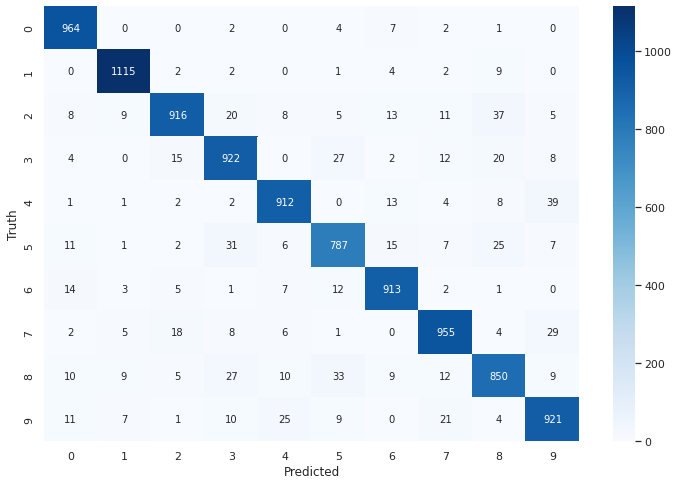

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Let's add a hidden layer and test our model

In [ ]:
model2 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2714 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1226 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0862 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0654 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0516 - accuracy: 0.9841


In [ ]:
model2.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0736 - accuracy: 0.9783


[0.07359712570905685, 0.9782999753952026]

In [ ]:
y_predict2 = model2.predict(X_test_flatten)
y_predict2_labels = [np.argmax(i) for i in y_predict2]

313/313 [==============================] - 1s 2ms/step


In [ ]:
cm2 = tf.math.confusion_matrix(labels=y_test,predictions=y_predict2_labels)

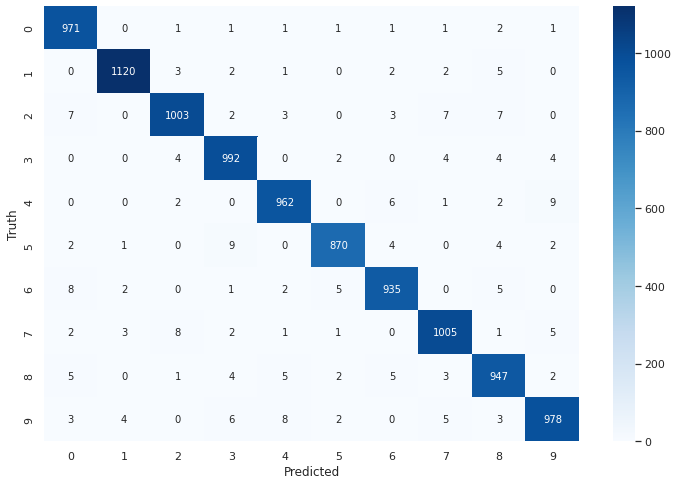

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cm2,annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

if don't want to flatten the data using keras,layers.flatten function

In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2807 - accuracy: 0.9193
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1265 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0876 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0664 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0523 - accuracy: 0.9841
